# Principles of Feedback Control

We have journeyed through the world of control hardware, diving deep into the intricacies of motion control systems. If you recall, we've explored specific applications of position control, speed control, and delved into electromechanical servos, both DC and AC types. In addition, we've touched upon process control hardware for applications such as temperature control.

Today, we embark on a new chapter: **Feedback Control Theory**. As we progress, I'll be drawing from our previous discussions on hardware, using them as real-world examples to elucidate the theoretical concepts.

## Feedback Control System Diagram

To kickstart our journey, let's revisit the basic feedback diagram we previously discussed. Here's a visualization:

<table> 
<tr>
    <img src="./pics/13_Principles_of_Feedback_Control_feedback_loop.png?2" alt="13_Principles_of_Feedback_Control_feedback_loop" style="width:650px;"/>
</tr></table>

- **$G(s)$**: This represents the plant, which we will, for simplification, denote as SG.
- **$D$**: The transfer function of our controller.
- **$N$**: A model capturing disturbances acting on the system.
- **$H$**: The transfer function of our sensor.
- **$y$**: Our controlled variable.
- **$y_r$**: The command or reference signal.
- **$e = y_r - y$**: The error signal


The error detector compares the reference signal with the feedback signal to produce the actuating signal, $\hat{e}$. Our controlled signal is denoted by **$u$**.

Broadly, this diagram encapsulates the features of most control systems you'll encounter.

🤔 **Pop-Up Question: What do the symbols G, D, and H represent in the feedback control system diagram?**
- A. Controlled Variable, Disturbance, Sensor
- B. Plant, Controller, Sensor
- C. Actuating Signal, Controller, Error

**Answer**: B. Plant, Controller, Sensor*

## Objectives of Design

**Our primary objective?**
Ensure that the controlled variable, $y$, closely mirrors $y_r$ for all time $t \ge t_0$ (where $t_0$ marks the point when control begins):

$$
y(t) \approx y_r(t)\;\;\;t \ge t_0
$$


However, challenges arise. Let's dive deeper.


A common industrial scenario is when $y_r$ remains constant over an extended period (set-point), and the goal is for $y$ to swiftly align with $y_r$ and maintain that value.

This scenario is termed as **set-point control** or **regulator problem**.

Two key *performance* measures arise:

1. **Settling Time**: The duration $y$ takes to approach $y_r$. Lower settling times indicate a system's superior speed of response (quicker response). 
2. **Steady State Accuracy**: Once equilibrium is achieved, $y$ should stay close to $y_r$. The difference, or steady state error, ideally should be zero.

These are in a nutshel the control requirements.

However, the real-world is complex, and various constraints can impede our objectives. Let's explore these:

### 1. **Stability**

A paramount consideration. A stable system doesn't exhibit large response variations to minor changes in command signals, disturbances, or system parameters. While we will delve into a quantitative definition of stability later, always remember that all performance specifications must be met under the umbrella of stability.

### 2. **Input Amplitude Constraints**

The validity of our linear model hinges on ensuring signal amplitudes remain within certain bounds. Exceeding these can render our linear model assumptions void.

It is essential to understand that when we adopt a transfer function model, we're assuming that it accurately represents every component of the system. This encompasses the plant, controller, sensor, and more. This is validated by the type of block diagram we use for our designs.

However, not everything is straightforward. Ponder this: What if the amplitude of various signals exceeds a certain threshold? The repercussions would be significant. The linearity assumption, which is foundational for our system, would no longer hold. As a result, the fundamental block diagram underpinning our design would be rendered inaccurate. This deviation could lead to unsatisfactory results in real-world applications.

It's clear that our design should remain within certain amplitude constraints. If not, our system's linear model might be invalidated, compromising the reliability of the entire system. 

This is also true when you simulate your system in the lab. You must take into account the limits on the signals so that you can stay under your linear assumptions.

**🤔 Pop-up Question**: What happens if the amplitude of signals surpasses a certain limit in our control system?

**Answer**: The linearity assumption becomes invalid, making our foundational block diagram inaccurate. This can result in the design not performing as expected in real-world situations.

### 3. **Disturbance Rejection**: 

Our system should maintain its accuracy and speed of response, even in the face of disturbances. Thus, a good design should effectively filter out disturbances' effects.

Every control system aspires for two primary goals: 

1. **Speed of Response**: This refers to how quickly a system reacts to an input signal.
2. **Steady State Accuracy**: This implies how accurately the system can maintain its state in response to a command signal.

Yet, disturbances pose challenges. It's imperative for the system to mitigate disturbances effectively to ensure that they don't jeopardize its speed of response or steady-state accuracy. Disturbances are particularly problematic because they're typically **unknown**. If we could predict them, they wouldn't pose as much of a challenge. However, real-world disturbances are often random and unpredictable.

**🤔 Popup Question:** Why are disturbances challenging for a control system?

**Answer:** They are typically unknown, random, and can negatively affect the system's speed of response and steady-state accuracy.

--- 

**Upcoming Discussions**

We've touched upon some vital aspects of feedback control theory today. As we continue, we will delve deeper into each constraint and explore strategies to navigate them. Moreover, in our subsequent sessions, real-world application examples will further illustrate these concepts.

For now, keep these concepts fresh in your mind, and as always, feel free to revisit previous chapters to reinforce your understanding.

### **Noise Filtering**

One intrinsic downside of feedback control is the inevitable use of a sensor. In an ideal world, without the need for feedback, we wouldn't require sensors (no feedback would be required). But sensors, while vital, introduce high-frequency noise into the system. If this noise dominates, the system might end up responding more to the noise than to the actual signal, leading to undesirable outcomes. Addressing this requires introducing suitable high-frequency filters within the feedback loop.

### **Sensitivity and Robustness**

The concepts of sensitivity and robustness are intertwined. A control system's plant is modeled by a function, $G(s)$. 

This model encompasses various physical components. During our modeling endeavors, it's evident that capturing every nuance of a physical system within a model is not possible. This results in modeling errors.

For example, when we model the temperature in a tank we assume that the temperature is uniform through the tank. However the actual system is distributed and different parts of the tank can be at different temperatures. Or in a mechanical system, the spring effect (torsion) of the shaft of a motor is usually considered zero.

Now, while it's possible to create more complex models to better capture the nuances, this often leads to equally complex design algorithms. And therein lies the conundrum. Sometimes, simpler models with simpler design algorithms prove more effective than their complex counterparts.

One reason for this is that we have very powerful design tools for simple linear models. Using complex models might mean that we do not have an appropriate design algorithm which needs to be researched and worked on. This might become so complex that might not even be worth it.

_When we talk about our plant model $G(s)$, we always need to be aware that we will have:_
- _**modeling errors**. Appropriate tests should be done on your design to verify that approximations and model simplifications are valid._
- _**parameter changes with time**._

**Robustness** is the system's ability to perform satisfactorily despite **finite changes** in its model, either due to errors or parameter variations. 

In contrast, **sensitivity** relates to how a system responds to **differentially small changes.** A system that is insensitive to parameter variations is often considered robust.

🤔 **Popup Question:** What differentiates robustness from sensitivity in a control system?

**Answer:** Robustness pertains to a system's performance despite finite model changes, while sensitivity relates to its reaction to very small changes.

The term "robustness" is still a topic of active research. While we might occasionally refer to a design as "robust," it's essential to remember that in our context, it often denotes a qualitative form of sensitivity-based design.

### **Shaping the Dynamic Response**

When we talk about control systems, one of the essential aspects to understand is the shaping of the dynamic response (or improving its _transient response_). This aspect plays a crucial role in achieving the desired performance for our system.

While theoretically, we might desire instantaneous reactions, physical components always introduce some delay. This delay manifests as a "settling time," the time the system takes to stabilize its output. Additionally, there's the steady-state error, the deviation between the desired and actual outputs once the system stabilizes.



<table> 
<tr>
    <img src="./pics/13_Principles_of_Feedback_Control_shaping_dynamic_response.png?2" alt="13_Principles_of_Feedback_Control_shaping_dynamic_response" style="width:650px;"/>
</tr></table>


With reference to the picture above: At t=0, imagine a constant command signal $ y_r $ is given to the system. Now, ideally, the controlled variable $ y $ should track $ y_r $ as closely as possible, achieving a near-instantaneous response.

But here's the catch! Achieving an instantaneous response is impractical because every system component has a certain delay or lag. Due to these lags, the system takes a finite amount of time to reach the desired value $ y_r $.

These lags or delays in the system response can be due to various factors like the inherent nature of the components used, external disturbances, and even intentional dampening added for stability purposes.

#### Settling Time and Speed of Response

If our system response were to look something like this, 

<table> 
<tr>
    <img src="./pics/13_Principles_of_Feedback_Control_shaping_dynamic_response.png?2" alt="13_Principles_of_Feedback_Control_shaping_dynamic_response" style="width:650px;"/>
</tr></table>

_Figure: the controlled variable's response over time, oscillating around the desired signal $ y_r $ before finally settling._

The time it takes for the system response to stabilize around the desired output is called the "settling time". A lower settling time indicates a faster system response, often referred to as the "speed of response".

#### Steady-State Accuracy

Once the system settles, it is crucial to check the difference between the actual controlled variable $ y $ and the desired signal $ y_r $. This difference is the steady-state error, and minimizing this error is a measure of the system's steady-state accuracy.

🤔 **Popup Question**: What is steady-state error?
**Answer**: Steady-state error is the difference between the actual controlled variable and the desired signal once the system has settled.

#### To Oscillate or Not to Oscillate?

A key question in control systems! Oscillations can be beneficial as they can increase the speed of response. However, large oscillations might lead to system saturation or even damage components.

An oscillatory response can be a sign of an underdamped system, which may have good speed of response but risks overshooting. An overdamped system, on the other hand, might have a slower response but will not overshoot the desired output.

🤔**Popup Question**: What might be the risks of an underdamped system?
**Answer**: An underdamped system may have a faster response but risks overshooting the desired output and might lead to large oscillations, which can damage system components or lead to system saturation.

On the other hand, a heavily damped or overdamped system might suppress oscillations and take longer to reach the steady-state. This results in a slower speed of response. Therefore, a balance or compromise is often sought in design.

The customer might only tell you: "this is the maximum amplitude of the response and this is the speed of response, and it will be your responsibility as control engineer to shape the dynamic response to meet the constaints on the input/output amplitude and the speed of response (and any other you might have)."

#### Settling Time Illustrated

To clarify, imagine two responses:

1. Overdamped Response: Takes longer to settle, but with no oscillations.
2. Underdamped Response: Settles faster, but with oscillations.

The time taken for each system to settle within a certain acceptable range (like 2% or 5%) around the steady state value defines the settling time. This definition helps designers determine if the system meets user requirements.

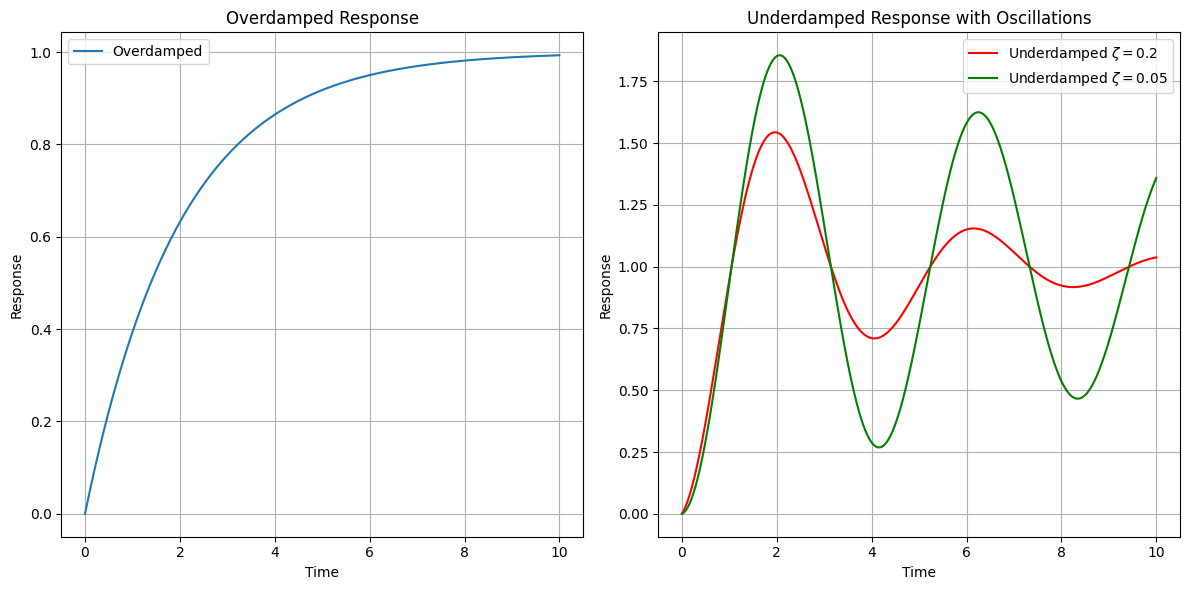

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 1000)

# Overdamped Response
# Parameters for the overdamped system
a1, a2 = .5, 1
y_overdamped = 1 - np.exp(-a1 * t)

# Underdamped Response
# Parameters for the underdamped system
omega_d = 1.5  # damped frequency
zeta = 0.2  # damping ratio (zeta < 1 for underdamped)
y_underdamped = 1- np.exp(-zeta * omega_d * t) * np.cos(omega_d * t)

omega_d = 1.5  # damped frequency
zeta = 0.05  # damping ratio (zeta < 1 for underdamped)
y_underdamped_1 = 1- np.exp(-zeta * omega_d * t) * np.cos(omega_d * t)


# Create plots
plt.figure(figsize=(12, 6))

# Overdamped plot
plt.subplot(1, 2, 1)
plt.plot(t, y_overdamped, label='Overdamped')
plt.title('Overdamped Response')
plt.xlabel('Time')
plt.ylabel('Response')
plt.grid(True)
plt.legend()

# Underdamped plot
plt.subplot(1, 2, 2)
plt.plot(t, y_underdamped, label=r'Underdamped $\zeta=0.2$', color='r')
plt.plot(t, y_underdamped_1, label=r'Underdamped $\zeta=0.05$', color='g')
plt.title('Underdamped Response with Oscillations')
plt.xlabel('Time')
plt.ylabel('Response')
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


#### Steady state accuracy

Final requirement that we consider.

Steady-state accuracy refers to the ability of a system (often a control system) to accurately reach its desired output value (or set-point) in the steady state, i.e., after any transient effects have decayed and the system has settled. It is a measure of how close the steady-state output of a system is to its desired value.

In control systems, steady-state errors are common specifications to evaluate how well a system can track a reference input, such as step, ramp, or parabolic inputs. The steady-state error is the difference between the actual output and the desired output as time approaches infinity (after all transient behaviors have disappeared).

#### Conflict in Design Requirements

Achieving an optimal design is complex due to the conflicts between various requirements. For instance:

1. Improving steady-state accuracy (which typically involes introducing integral control actions) might result in larger oscillations or even instability.
2. Filtering out disturbances might increase the effects of noise on the system.

It becomes evident that these requirements are not always harmonious. Achieving one might compromise another. This is why the role of a system designer is so crucial; they must strike the right balance between these conflicting requirements.

🤔 **Popup Question**: Why can't we always achieve the best of all requirements in control system design?
**Answer**: Many design requirements are in conflict. For instance, improving steady-state accuracy might lead to larger oscillations or instability. Hence, a balance is needed, and achieving the best of all worlds might not be possible.

## Feedback vs Open-loop Systems in Sensitivity Analysis

Feedback and open-loop systems are fundamental concepts in control engineering. In this part of the notebook, we will delve into the sensitivity analysis of these systems. Sensitivity analysis helps us understand how small changes in system parameters can impact the overall performance.

### Quick Recap:
**Feedback System (Closed-loop System)**: A system where a portion of the output is fed back to the input to regulate its behavior.

**Open-loop System**: A system that functions without considering any feedback from its output.

Now, let us unravel the sensitivity issues related to these systems.

## Sensitivity Analysis

Sensitivity, in the context of systems, refers to the measure of how a change in a system parameter affects the system's performance. 

Mathematically, consider $ J $ to be a performance measure like speed of response, which is a function of a parameter $ \theta $ of the plant.

Assuming $ \theta $ has a nominal value $ \theta_n $ with a deviation $ \Delta \theta $, the sensitivity is concerned with how small variations in $ \theta $ impact $ J $. 

The nominal value of your performance (e.g., speed of response) is:

$$
J_n = J( \theta_n )
$$

Since sensitivity is concerned with differentially small variations, we can use the Taylor series expansion for $J$ around its nominal point.

Using Taylor series expansion, the effect of changes in $ \theta $ on $ J $ can be represented as:

$$
J(\theta_n + \Delta \theta) = J(\theta_n) + \frac{d J}{d \theta} \Bigg|_{\theta = \theta_n} \Delta \theta + \text{higher order terms} 
$$

For our analysis, we neglect the higher order terms, considering only the first order variation, and hence our equation becomes:

$$
J(\theta_n + \Delta \theta) = J(\theta_n) + \frac{d J}{d \theta} \Bigg|_{\theta = \theta_n} \Delta \theta 
$$



## Quantitative Sensitivity Definition

The sensitivity of $ J $ with respect to variations in $ \theta $, symbolized by $ S^J_{\theta} $, is defined as:

$$ S^J_{\theta} = \frac{\Delta J / J_n}{\Delta \theta / \theta_n} $$

This formula represents an input-output sensitivity model. 

- Here, $ \Delta \theta / \theta_n $ can be considered as the input, and $ \Delta J / J_n $ as the output. 

- This sensitivity function $ S^J_{\theta} $ helps in determining how the system responds to various variations in $ \Delta \theta / \theta_n $.

<table> 
<tr>
    <img src="./pics/13_Principles_of_Feedback_Control_sensitivity_analsysis.png?2" alt="13_Principles_of_Feedback_Control_sensitivity_analsysis" style="width:450px;"/>
</tr></table>

Once the model $ S^J_{\theta} $ is available, it becomes a simulation exercise to understand the impact of the parameter variations on the performance. Exactly how we do it for the plant.

Note that we will give finite variations to the parameters even though our model is developed for differentially small changes. This model fortunally works also for finite small variations.

## Feedback System and Sensitivity

Let's calculate our model.

From 

$$
J(\theta_n + \Delta \theta) = J(\theta_n) + \frac{d J}{d \theta} \Bigg|_{\theta = \theta_n} \Delta \theta 
$$

we obtain that:

$$
\Delta J = J(\theta_n + \Delta \theta) - J(\theta_n) = \frac{d J}{d \theta} \Bigg|_{\theta = \theta_n} \Delta \theta 
$$

And therefore:

$$
S^J_{\theta} = \frac{\Big [ \frac{d J}{d \theta} \Big|_{\theta = \theta_n} \Delta \theta \Big]/J_n }{\Delta \theta / \theta_n} = \Big [ \frac{d J}{d \theta} \Bigg|_{\theta = \theta_n} \Big]\frac{\theta_n}{J_n}
$$


For a specific system you will need to evaluate $\frac{d J}{d \theta} \Big|_{\theta = \theta_n}$, $\theta_n$ and $J_n$ are the nominal values.

### Effect of Feedback on Sensitivity

Given our understanding of sensitivity, let's examine the effect of feedback on sensitivity. For this, consider the basic feedback loop (assume no disturbance):

<table> 
<tr>
    <img src="./pics/13_Principles_of_Feedback_Control_feedback_loop_basic.png?2" alt="13_Principles_of_Feedback_Control_feedback_loop_basic" style="width:450px;"/>
</tr></table>



The transfer function of this system is:

$$
M = \frac{Y}{R} = \frac{D \cdot G}{1 + D \cdot G \cdot H} 
$$

**Analysis**:

- Parameters of the controller $ D $ are within our control (it is an open system that we design), while $ G $ and $ H $ (system hardware) might change.
- To understand how variations in $ G $ (or $ H $) affect the output $ Y $, we can derive two sensitivity functions:

$$ S^M_{G} $$ and $$ S^M_{H} $$

Both $G$ and $H$ depend on paramater variations: 
- $G$ is a function of $\theta$, $G(\theta)$, and 
- $H$ is a function of $\alpha$, $H(\alpha)$.

We would like to study:
- the effect of variations of $\theta$ on $Y$ (using $S^M_{G}$): equivalent to study the effects of variations of $G$ on $M$
- the effect of variations of $\alpha$ on $Y$ (using $S^M_{H}$): equivalent to study the effects of variations of $H$ on $M$

At this point, expliciting the presence of the parameter $\theta$ we can write:

$$
M(\theta_n, s) = \frac{D(s)G(\theta_n,s)}{1 + D(s) \cdot G(\theta_n, s) \cdot H(s)} 
$$


Using the sensitivity definition, we can now calculate the sensitivity of $ M $ with respect to $ G $, $S^M_{G}$.

First, we need to calculate:

$$
\begin{align}
\frac{dM}{d\theta}\Bigg|_{\theta = \theta_n} = \frac{D}{(1+D\cdot G\cdot H)^2}\frac{dG(\theta,s)}{d\theta}\Bigg|_{\theta=\theta_n}
\end{align}
$$



From this expression we can find $S^M_{G}$.

First we can convert differential changes into finite changes and calculate $\frac{\Delta M}{M}$ - dividing the above expression (1) by $M$:

$$
\frac{\Delta M}{M} \Bigg|_{\theta=\theta_n} = \frac{D}{1+D\cdot G\cdot H}  \times \frac{1+D\cdot G\cdot H}{DG} \frac{dG}{d\theta}\Bigg|_{\theta=\theta_n} = \frac{1}{1+D\cdot G\cdot H}\frac{dG}{G}\Bigg|_{\theta=\theta_n}
$$

from this expression we can obtain: 

$$
S^M_{G} = S(\theta_n, s) = \frac{1}{1 + D(s) \cdot G(\theta_n,s) \cdot H(s)}
$$

Which is simply obtained dividing $\frac{\Delta M}{M}$ by $\frac{dG}{G}$.

#### Comments
- From the above expression, the interpretation is clear: by suitably controlling the gain of the controller $ D $, we can adjust the loop gain ($D(s) \cdot G(\theta_n,s) \cdot H(s)$) and thereby reduce the sensitivity to a desired level. Essentially, higher loop gain results in lower sensitivity.
- $ D(s) $ represents the controller. What's unique about $ D(s) $ is that it's within our control; we can modify it as per our needs.
- By adeptly controlling the gain of $ D $, we can manipulate this loop gain to adjust the system's sensitivity as desired. The underlying principle is straightforward: **higher the loop gain, the lower the system's sensitivity.**


🤔 **Popup Question**: What is the sensitivity of an open-loop system?
**Answer**: In an open-loop system, since there is no feedback, $ H = 0 $. Hence, the sensitivity of the system with respect to $ G $ would be 1, indicating that any change in $ G $ would result in a proportional change in the output.

**Sensitivity of Open-Loop and Closed-Loop Systems**
A key question arises: What is the sensitivity of an open-loop system? To understand this, let's evaluate the feedback diagram. 

In the scenario where $ H $ is set to zero (i.e., $ H = 0 $), effectively eliminating the feedback loop, the sensitivity of the system with respect to $ G $ becomes 1:

$$
S^M_{G} = 1\;\;\; \text{for the open loop system}
$$

This conclusion can be derived from our initial expression. When you eliminate $ H $, the expression clearly points to the sensitivity being equal to 1.

This points to a pivotal understanding: An open-loop system is highly sensitive to variations in $ G $ with a sensitivity of 1. 

However, the beauty of feedback control emerges here. By judiciously designing the feedback control, specifically the controller $ D(s) $, we can manage and curtail this sensitivity as per our requirements.



**Sensitivity with respect to the Sensor**

Let's delve into another dimension of sensitivity: the sensitivity of $ M $ with respect to $ H $, the sensor. 

The sensitivity of $ M $ with respect to $ H $ can be expressed as (its derivation is left to the reader):

$$ S^M_{H} = \frac{-D(s) \cdot G(s) \cdot H(s)}{1 + D(s) \cdot G(s) \cdot H(\alpha, s)} $$


- When you increase the loop gain, the system's sensitivity to changes in the plant parameters decreases. However, it also means that the system becomes very sensitive to variations in the sensor parameters.

- When the loop gain increases $S^M_{H}\rightarrow 1$. 

🤔 **Popup Question**: How does the sensitivity of the system change with variations in $ H $ (when we increase the loop gain)?

**Answer**: The system becomes more sensitive to the sensor as the loop gain increases. The magnitude of the sensitivity approaches 1.

This means that by introducing a sensor into the system, we have inadvertently also introduced a potential point of high sensitivity. This emphasizes the importance of the sensor's design. The hardware design must account for sensitivity issues, ensuring that the sensor is appropriate for the specific plant under consideration.

**On the Importance of Sensor Design**
The feedback mechanism's introduction, while crucial for control, brings along the challenge of sensitivity due to variations in sensor parameters. It underscores the need for meticulous sensor design. 

Note that this is due to the fact that we have a sensor to close the loop. The introduction of the feedback has brought a potential new problem. This means that when we select a sensor we need to ensure that the sensor parameters will not change.

While modifying a plant—often a vast industrial setting—is a daunting, if not impossible, task, modifying a sensor is more feasible. Therefore, the design of the sensor must be such that its parameters remain consistent and reliable. Otherwise, the sensor could introduce unforeseen challenges into the loop, potentially undermining the entire control system.

It's worth noting that in industrial applications, the cost of modifying an entire plant can be exorbitant, but sensors are comparatively cheaper and more flexible components. Hence, investing time and resources in perfecting the sensor design pays dividends in the long run.

🤔 **Popup Question**: Why is the design of the sensor so crucial in control systems?

**Answer**: Because the introduction of feedback makes the system highly sensitive to the sensor, and ensuring that the sensor parameters don't change is often more feasible than modifying an entire plant.


---

### Sidebar - derivative of $M$ with respect to $\theta$

Given the function $ M(\theta, s) $ as:

$ M(\theta, s) = \frac{D(s)G(\theta,s)}{1 + D(s) \cdot G(\theta, s) \cdot H(s)} $

You want the partial derivative with respect to $ \theta $. 

1. Differentiate a Quotient: If you have a function $ f(x) = \frac{u(x)}{v(x)} $, its derivative is given by

$ f'(x) = \frac{u'v - uv'}{v^2} $

Where $ u' $ and $ v' $ are the derivatives of $ u $ and $ v $ respectively.


2. Now, applying this to our function, let:

$$ u(\theta, s) = D(s)G(\theta,s) $$

$$ v(\theta, s) = 1 + D(s) \cdot G(\theta, s) \cdot H(s) $$

Then, the partial derivatives are:

$$ \frac{\partial u}{\partial \theta} = D(s) \frac{\partial G(\theta,s)}{\partial \theta} $$

Since $ D(s) $ is not a function of $ \theta $.

$$ \frac{\partial v}{\partial \theta} = D(s) \cdot H(s) \frac{\partial G(\theta,s)}{\partial \theta} $$

Again, this is because only $ G(\theta,s) $ is dependent on $ \theta $.

3. Now, plug these into our quotient rule:

$$ \frac{\partial M(\theta, s)}{\partial \theta} = \frac{\left( D(s) \frac{\partial G(\theta,s)}{\partial \theta} \right) \left( 1 + D(s) \cdot G(\theta, s) \cdot H(s) \right) - \left( D(s)G(\theta,s) \right) \left( D(s) \cdot H(s) \frac{\partial G(\theta,s)}{\partial \theta} \right)}{\left( 1 + D(s) \cdot G(\theta, s) \cdot H(s) \right)^2} $$

4. Now, simplifying, we get:

$$ \frac{\partial M(\theta, s)}{\partial \theta} = \frac{D(s) \frac{\partial G(\theta,s)}{\partial \theta} + D(s)^2 \frac{\partial G(\theta,s)}{\partial \theta} G(\theta, s) H(s) - D(s)^2 G(\theta,s) H(s) \frac{\partial G(\theta,s)}{\partial \theta}}{\left( 1 + D(s) \cdot G(\theta, s) \cdot H(s) \right)^2} $$

5. Combining the terms with common factors:

$$ \frac{\partial M(\theta, s)}{\partial \theta} = \frac{D(s) \frac{\partial G(\theta,s)}{\partial \theta} (1 + D(s) G(\theta, s) H(s) - D(s) G(\theta,s) H(s))}{\left( 1 + D(s) \cdot G(\theta, s) \cdot H(s) \right)^2} $$

6. Continuing to simplify:

$$ \frac{\partial M(\theta, s)}{\partial \theta} = \frac{D(s) \frac{\partial G(\theta,s)}{\partial \theta}}{\left( 1 + D(s) \cdot G(\theta, s) \cdot H(s) \right)^2} $$

That's the partial derivative of $ M(\theta, s) $ with respect to $ \theta $.

-- END OF SIDEBAR